In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

In [2]:
batch_size=32
TEST_PATH="DATA/chest_xray/test/"
gen=ImageDataGenerator(rescale=1./255)
test_data=gen.flow_from_directory(TEST_PATH,
                                      target_size=(64,64),
                                      batch_size=batch_size,
                                      color_mode='grayscale',
                                      class_mode='categorical')

Found 624 images belonging to 2 classes.


In [3]:
cnn=load_model("final_cnn_model")
loss,acc=cnn.evaluate(test_data)
print("Loss: %.2f, Acc: %.2f" %(loss,acc))

20/20 [==============================] - 5s 250ms/step - loss: 0.2256 - accuracy: 0.9199
Loss: 0.23, Acc: 0.92


In [4]:
images,classes=test_data.__getitem__(12)
#ground truth
gt=np.argmax(classes,axis=1)
#predictions
predict=cnn.predict(images)
predictions=np.argmax(predict,axis=1)

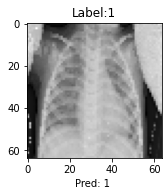

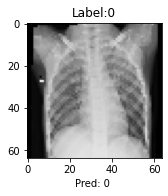

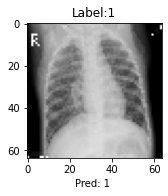

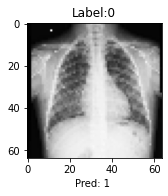

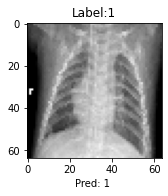

In [5]:
def display_prediction(images,labels,preds):
    for i in range(len(images)):
        fig=plt.figure(figsize=(14,10))
        plt.subplot(1,len(images),i+1)
        plt.imshow(images[i],cmap='gray')
        plt.title("Label:%d" %(labels[i]))
        plt.xlabel("Pred: %d " %(preds[i]))
        plt.show()

img=images[0:5]
labels=gt[0:5]
preds=predictions[0:5]

display_prediction(img,labels,preds)